@channel **Hello All,**

**2024-01-18 `19.1-Unsupervised-Learning-Introduction to Machine Learning`**

**Today’s lesson will begin with an introduction to machine learning (ML). For many students, this will be your first exposure to the topic.**

* [Teachable Machine project from Google](https://teachablemachine.withgoogle.com/v1/)
* [A.I. Experiments: Teachable Machine (Video)](https://www.youtube.com/watch?v=3BhkeY974Rg)
* [The Ultimate Guide to OpenAI's GPT-3 Language Model](https://www.twilio.com/blog/ultimate-guide-openai-gpt-3-language-model)
* [Supervised vs Unsupervised](https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d)
* [Data Prep](https://towardsdatascience.com/how-to-prepare-your-data-for-your-machine-learning-model-b4c9fd4e7ea)
* [K-means article](https://blog.easysol.net/machine-learning-algorithms-3/)


**Objectives**

* Recognize the differences between supervised and unsupervised machine learning.
* Define clustering and how it is used in data science.
* Apply the k-means algorithm to identify clusters in a given dataset.
* Determine the optimal number of clusters for a dataset using the elbow method.

**Presentation**
* [19.1-Introduction to Machine Learning](https://git.bootcampcontent.com/University-of-California---Berkeley/UCB-VIRT-DATA-PT-08-2023-U-LOLC/-/blob/main/Slides/Data-19.1-Introduction_to_Machine_Learning.pdf)

**Install**

```
python -m pip install -U pip
pip install --upgrade setuptools
pip install hvplot
pip install matplotlib
pip install -U scikit-learn
```

**To fix the scikit-learn issues run as administartor:**
```
pip install threadpoolctl
```
if it didn't work:
```
pip uninstall scikit-learn -y
pip install scikit-learn==1.0.2
```

**Best wishes.**

# ==========================================

In [ ]:
# !python -m pip install -U pip
# !pip install --upgrade setuptools
# !pip install hvplot
# !pip install matplotlib
# !pip install -U scikit-learn

### 1.01 Instructor Do: Clustering Explained (0:10)

In [2]:
# Import the modules
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [31]:
import sklearn
sklearn.__version__

'1.0.2'

In [4]:
# Generate three synthetic clusters
X, y = make_blobs(
    centers=3, 
    random_state=1
)

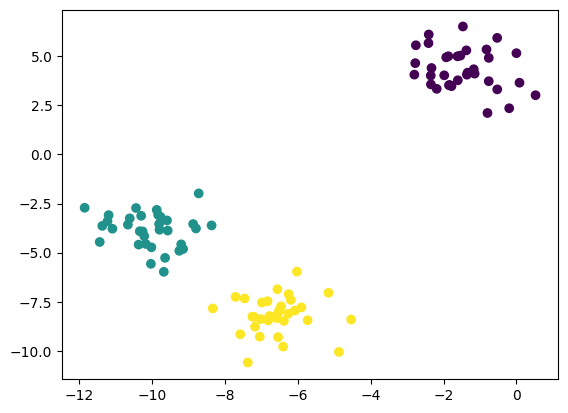

In [5]:
# Visualizing all three classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
# Generate five synthetic clusters
X, y = make_blobs(
    centers=5, 
    random_state=1
)

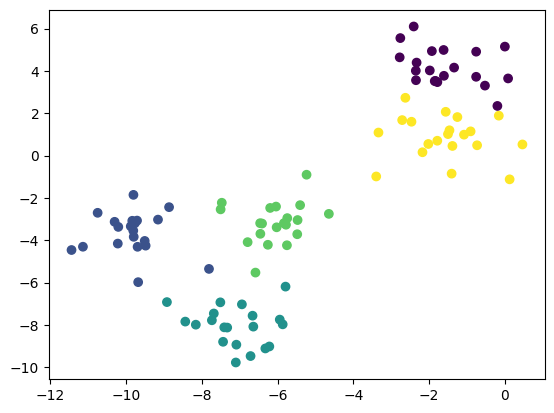

In [7]:
# Visualizing all five classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
# Generate synthetic clusters
X, y = make_blobs(
    centers=5, 
    random_state=1
)

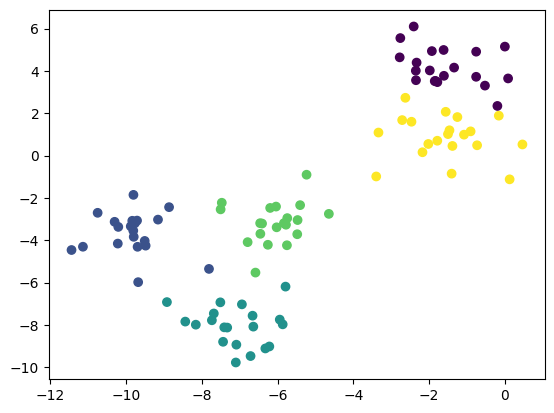

In [9]:
# Visualizing all classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [18]:
# Generate synthetic clusters
X, y = make_blobs(
    centers=3, 
    random_state=42
)

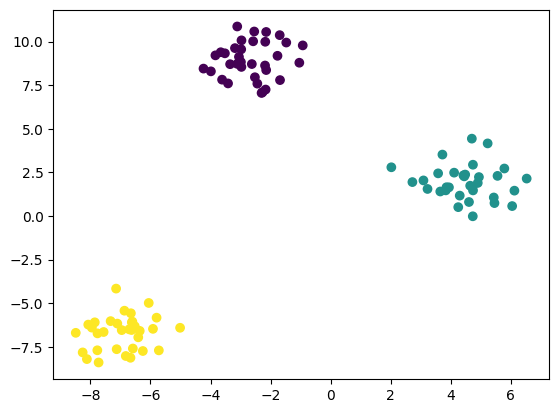

In [19]:
# Visualizing all classes
plt.scatter(X[:, 0], X[:, 1], c=y)

# ==========================================

### 1.02 Everyone Do: The K-means Algorithm (0:15)

| Supervised Learning                | Unsupervised Learning                      |
| ---------------------------------- | ------------------------------------------ |
| Input data are labeled              | Input data are unlabeled                    |
| Uses training datasets             | Uses just input datasets                   |
| **Goal:** Predict a class or value | **Goal:** Determine patterns or group data |

---
### 1.02 Instructor Do: Data Preparation for Unsupervised Learning (0:10)

In [20]:
# Import dependencies
import pandas as pd
from pathlib import Path
import hvplot.pandas

In [21]:
# Read in the CSV file as a Pandas DataFrame
service_ratings_df = pd.read_csv(
    Path("02-Ins_Kmeans/Resources/service_ratings.csv")
)

# Review the DataFrame
service_ratings_df.head()

,mobile_app_rating,personal_banker_rating
0,3.50,2.40
1,3.65,3.14
2,2.90,2.75
3,2.93,3.36
4,2.89,2.62


In [22]:
# Visualize a scatter plot of the data
service_ratings_df.hvplot.scatter(x="mobile_app_rating", y="personal_banker_rating")

:Scatter   [mobile_app_rating]   (personal_banker_rating)

## Run the k-means model with 2 clusters

In [23]:
# Start by importing the K-means algorithm
from sklearn.cluster import KMeans

In [24]:
# Create and initialize the K-means model instance for 2 clusters
model = KMeans(n_clusters=3, random_state=1)

# Print the model
model

KMeans(n_clusters=3, random_state=1)

In [26]:
# Fit the data to the instance of the model
model.fit(service_ratings_df)

KMeans(n_clusters=3, random_state=1)

In [27]:
# Make predictions about the data clusters using the trained model
customer_ratings = model.predict(service_ratings_df)

# Print the predictions
print(customer_ratings)

[0 1 2 2 2 2 1 1 2 2 1 0 1 1 0 1 2 1 2 2 1 1 2 1 2 0 2 1 2 0 1 2 1 0 1 2 2
 2 1 2 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 2 0 2 1 2 1 2 1 2 2 0 0 2 1 0 2 2 1
 2 1 0 2 1 1 1 0 2 1 1 1 2 1 0 2 1 2 1 1 0 1 0 1 2 1 0 2 1 2 1 1 2 2 1 1 2
 1 1 1 0 1 2 2 2 1 0 1 2 2 2 2 1 1 2 2 2 1 1 1 2 0 2 1 1 1 1 2 2 1 1 1 2 0
 1 2 2 2 0 1 1 1 0 1 1 1 2 1 0 2 1 2 2 2 2 0 1 2 0 1 1 2 1 1 1 2 1 0 1]


In [28]:
# Create a copy of the DataFrame
service_rating_predictions_df = service_ratings_df.copy()

# Add a column to the DataFrame that contains the customer_ratings information
service_rating_predictions_df['customer rating'] = customer_ratings

# Review the DataFrame
service_rating_predictions_df.head()

,mobile_app_rating,personal_banker_rating,customer rating
0,3.50,2.40,0
1,3.65,3.14,1
2,2.90,2.75,2
3,2.93,3.36,2
4,2.89,2.62,2


In [29]:
# Plot the data points based on the customer rating
service_rating_predictions_df.hvplot.scatter(
    x="mobile_app_rating", 
    y="personal_banker_rating", 
    by="customer rating"
)

:NdOverlay   [customer rating]
   :Scatter   [mobile_app_rating]   (personal_banker_rating)

# ==========================================

### 1.03 Students Do: Segmenting Customers (0:15) 

# Segmenting Customers

In this activity, you will create two K-means models to segment your customers: one with three clusters and one with four clusters. Then, you’ll compare these two models to the two-cluster model you previously created.

## Background

Your marketing department has just come back to you regarding the initial analysis you performed on the customer ratings for mobile application and in-person banker services. Although your initial analysis of grouping the customers into two segments was helpful, they are wondering if the data could be even more finely clustered.

You have been asked to review the customer ratings data when modeled with three and four clusters.

Using the information in the [starter file](Unsolved/segmenting_customers.ipynb), apply the K-means algorithm to the `service_ratings` data using both three and four clusters to segment the customer information.

## Instructions

1. Review the Pandas DataFrame and plot associated with `service_ratings.csv`.

2. Run the K-means algorithm identifying three clusters in the data. Make sure to do the following:

   - Create and initialize the K-means model for three clusters. Use a `random_state` value of 1 for the model.
   
   - Fit, or train, the model by using the `service_ratings_df` DataFrame.
   
   - Make predictions about the clustering by using the trained model. Save the predictions to a variable called `customer_segment_3` and print that variable.
   
   - Create a copy of the DataFrame and name it `service_ratings_predictions_df`.
   
   - Add a column to the `service_ratings_predictions_df` DataFrame called "customer_segment_3" and add the `customer_segment_3` information to the column.
   
   - Plot the data by using the DataFrame adjusted to include customer segment information for three clusters.

3. Run the K-means algorithm identifying four clusters in the data. Make sure to do the following: 

   - Create and initialize the K-means model for four clusters. Use a `random_state` value of 1 for the model.
   
   - Fit, or train, the model by using the `service_ratings_df` DataFrame.
   
   - Make predictions about the clustering by using the trained model. Save the predictions to a variable called `customer_segment_4` and print that variable.
   
   - Add a column to the `service_ratings_predictions_df` DataFrame called "customer_segment_4" and add the `customer_segment_4` information to the column.
   
   - Plot the data by using the DataFrame adjusted to include customer segment information for four clusters.

4. Answer the following question: Can any additional information be gleaned from the customer segmentation data when clusters of three and four are applied?

---

In [32]:
# Import the modules
import pandas as pd
from pathlib import Path
import hvplot.pandas

# Import the K-means algorithm
from sklearn.cluster import KMeans

In [33]:
# Read in the CSV file as a Pandas DataFrame
service_ratings_df = pd.read_csv(
    Path("03-Stu_Segmenting_Customers/Resources/service_ratings.csv")
)

# Review the DataFrame
service_ratings_df.head()

,mobile_app_rating,personal_banker_rating
0,3.50,2.40
1,3.65,3.14
2,2.90,2.75
3,2.93,3.36
4,2.89,2.62


In [34]:
# Visualize a scatter plot of the data
service_ratings_df.hvplot.scatter(
    x="mobile_app_rating", 
    y="personal_banker_rating"
)

:Scatter   [mobile_app_rating]   (personal_banker_rating)

## Run the k-means model with 3 clusters

In [35]:
# Create and initialize the K-means model instance for 3 clusters
model = KMeans(n_clusters=3, random_state=1)

# Print the model
model

KMeans(n_clusters=3, random_state=1)

In [36]:
# Fit the data to the instance of the model
model.fit(service_ratings_df)

KMeans(n_clusters=3, random_state=1)

In [37]:
# Make predictions about the data clusters using the trained model
customer_segment_3 = model.predict(service_ratings_df)

# Print the predictions
print(customer_segment_3)

[0 1 2 2 2 2 1 1 2 2 1 0 1 1 0 1 2 1 2 2 1 1 2 1 2 0 2 1 2 0 1 2 1 0 1 2 2
 2 1 2 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 2 0 2 1 2 1 2 1 2 2 0 0 2 1 0 2 2 1
 2 1 0 2 1 1 1 0 2 1 1 1 2 1 0 2 1 2 1 1 0 1 0 1 2 1 0 2 1 2 1 1 2 2 1 1 2
 1 1 1 0 1 2 2 2 1 0 1 2 2 2 2 1 1 2 2 2 1 1 1 2 0 2 1 1 1 1 2 2 1 1 1 2 0
 1 2 2 2 0 1 1 1 0 1 1 1 2 1 0 2 1 2 2 2 2 0 1 2 0 1 1 2 1 1 1 2 1 0 1]


In [38]:
# Create a copy of the DataFrame and name it as service_ratings_predictions_df
service_ratings_predictions_df = service_ratings_df.copy()

# Add a column to the DataFrame that contains the customer_segment information
service_ratings_predictions_df['customer_segment_3'] = customer_segment_3

# Review the DataFrame
service_ratings_predictions_df.head()

,mobile_app_rating,personal_banker_rating,customer_segment_3
0,3.50,2.40,0
1,3.65,3.14,1
2,2.90,2.75,2
3,2.93,3.36,2
4,2.89,2.62,2


In [39]:
# Plot the data points based on the customer rating
service_ratings_predictions_df.hvplot.scatter(
    x="mobile_app_rating", 
    y="personal_banker_rating", 
    by="customer_segment_3"
)

:NdOverlay   [customer_segment_3]
   :Scatter   [mobile_app_rating]   (personal_banker_rating)

## Run the k-means model with 4 clusters

In [40]:
# Create and initialize the K-means model instance for 4 clusters
model = KMeans(n_clusters=4, random_state=1)

# Print the model
model

KMeans(n_clusters=4, random_state=1)

In [41]:
# Fit the data to the instance of the model
model.fit(service_ratings_df)

KMeans(n_clusters=4, random_state=1)

In [42]:
# Make predictions about the data clusters using the trained model
customer_segment_4 = model.predict(service_ratings_df)

# Print the predictions
print(customer_segment_4)

[3 1 0 0 0 0 0 1 0 2 0 0 1 0 3 1 0 1 0 0 1 1 0 1 0 3 2 1 2 3 1 0 1 3 1 0 0
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 3 0 0 0 1 0 0 0 0 3 3 0 0 3 2 0 1
 2 1 3 0 1 1 1 3 2 1 1 0 2 1 3 2 1 0 0 1 3 1 3 1 0 0 3 0 1 0 1 1 2 2 1 1 0
 0 1 1 3 1 2 2 0 1 3 0 0 0 0 0 0 1 0 0 0 1 1 1 0 3 0 1 1 0 1 0 0 1 1 0 0 0
 1 0 2 0 3 1 1 1 3 1 1 1 0 1 3 0 1 0 0 0 2 3 1 0 3 0 0 2 1 3 1 0 0 3 1]


In [43]:
# Add a column to the service_ratings_predictions_df DataFrame that contains the customer_segment information
service_ratings_predictions_df['customer_segment_4'] = customer_segment_4

# Review the DataFrame
service_ratings_predictions_df.head()

,mobile_app_rating,personal_banker_rating,customer_segment_3,customer_segment_4
0,3.50,2.40,0,3
1,3.65,3.14,1,1
2,2.90,2.75,2,0
3,2.93,3.36,2,0
4,2.89,2.62,2,0


In [44]:
# Plot the data points based on the customer rating
service_ratings_predictions_df.hvplot.scatter(
    x="mobile_app_rating", 
    y="personal_banker_rating", 
    by="customer_segment_4"
)

:NdOverlay   [customer_segment_4]
   :Scatter   [mobile_app_rating]   (personal_banker_rating)

## Answer the following question

**Question:** Can any additional information be gleaned from the customer segmentation data when clusters of 3 and 4 are applied?

**Answers:** Segmenting the data into 4 clusters was quite insightful. What is designated as cluster 3, customers with the highest personal banker service ratings, really rated service received through the mobile application quite poorly. Those users will either continue to consume in-person banking services, or they should be contacted for additional assistance on using the mobile application.  

# ==========================================

### BREAK (0:10)

# ==========================================

### 1.04.1 Instructor Do: Introduction to Clustering Optimization (0:10) 

In [45]:
import sklearn
sklearn.__version__

'1.0.2'

### 1.04 Everyone Do: The Elbow Method (0:25) 

In [46]:
# Import the modules
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans

In [47]:
# Read in the CSV file as a Pandas DataFrame
service_ratings_df = pd.read_csv(
    Path("04-Evr_Elbow_Method/Resources/service_ratings.csv")
)

# Review the DataFrame
service_ratings_df.head()

,mobile_app_rating,personal_banker_rating
0,3.50,2.40
1,3.65,3.14
2,2.90,2.75
3,2.93,3.36
4,2.89,2.62


In [57]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 10))
# k

In [58]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(service_ratings_df)
    inertia.append(k_model.inertia_)

In [59]:
# inertia

In [60]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(10)

,k,inertia
0,1,122.472196
1,2,77.080190
2,3,58.443470
3,4,42.595218
4,5,34.624700
5,6,29.011308
6,7,23.807186
7,8,20.142483
8,9,18.201664


In [61]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

## Using k-means with four clusters

In [67]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(service_ratings_df)

# Make predictions
k_4 = model.predict(service_ratings_df)

# Create a copy of the DataFrame
service_ratings_predictions_df = service_ratings_df.copy()

# Add a class column with the labels
service_ratings_predictions_df['customer_segment'] = k_4

In [68]:
# Plot the clusters
service_ratings_predictions_df.hvplot.scatter(
    x="mobile_app_rating",
    y="personal_banker_rating",
    by="customer_segment"
)

:NdOverlay   [customer_segment]
   :Scatter   [mobile_app_rating]   (personal_banker_rating)

# ==========================================

### 1.05 Students Do: Finding k (0:25) 

# Finding k

In this activity, you will use the elbow method to determine the optimal number of clusters that should be used to segment a dataset of stock pricing information.

## Background

You have been analyzing the pricing data on one of the stocks your firm owns. Specifically, you were examining the relationship between the day's trading volume and the spread between the high and low trading price.

Using the information contained in the starter file, use the elbow method to determine the optimal number of clusters, `k`, that should be used to segment these trades. Once the elbow curve has been established, evaluate the two most likely values for `k` using the K-means algorithm and a scatter plot.

## Instructions

1. Read in the `stock_data.csv` file from the Resources folder and create a DataFrame. Set the “date” column to create the DatetimeIndex. Be sure to include parameters for `parse_dates` and `infer_datetime_format`.

2. Scale the data by using the `StandardScaler` module to normalize the DataFrame values.

3. Create a new DataFrame with the scaled data and name it `spread_scaled_df`.

   > **Hint:** You can use the columns and index DataFrame's attributes to set the column names and the index of the new DataFrame. Review [this article from the Pandas documentation](https://pandas.pydata.org/docs/reference/frame.html#attributes-and-underlying-data) if you want a refresher.

4. Create two lists: one to hold the list of inertia scores, and another for the range of k values (from 1 to 11) to analyze.

5. Using a `for` loop to evaluate each instance of k, define a K-means model, fit the K-means model based on the DataFrame, and append the model’s inertia to the empty inertia list that you created in the previous step.

6. Store the values for k and the inertia in a dictionary called `elbow_data`. Use `elbow_data` to create a Pandas DataFrame called `df_elbow`.

7. Using hvPlot, plot the `df_elbow` DataFrame to visualize the elbow curve.

8. Perform the following tasks for each of the two most likely values of `k`:

   - Define a K-means model by using `k` to define the clusters, fit the model, make predictions, and add the prediction values to a copy of the scaled DataFrame named `spread_predictions_df`.

   - Plot the clusters. The x-axis should reflect the "hi_low_spread", and the y-axis should reflect the "volume".

9. Answer the following question: Considering the plot, what’s the best number of clusters or value of k to choose?

---

In [ ]:
# Import the modules
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read in the CSV file as a Pandas DataFrame
spread_df = pd.read_csv(
    Path("05-Stu_Finding_k/Resources/stock_data.csv"),
    index_col="date", 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the DataFrame
spread_df.head()

In [ ]:
scaler = StandardScaler()
scaler.fit(spread_df)
scaled_df = scaler.transform(spread_df)

In [ ]:
scaled_df

In [ ]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))

In [ ]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_df)
    inertia.append(k_model.inertia_)

In [ ]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

In [ ]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

## Perform the following tasks for each of the two most likely values of `k`:

* Define a K-means model using `k` to define the clusters, fit the model, make predictions, and add the prediction values to a copy of the scaled DataFrame and call it `spread_predictions_df`.

* Plot the clusters. The x-axis should reflect the "hi_low_spread", and the y-axis should reflect the "close" price.

In [ ]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(scaled_df)

# Make predictions
k_lower = model.predict(scaled_df)

# Create a copy of the DataFrame and name it as spread_df_predictions
spread_df_predictions = spread_df.copy()

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_lower'] = k_lower

In [ ]:
spread_df_predictions

In [ ]:
# Plot the clusters
spread_df_predictions.hvplot.scatter(
    x="hi_low_spread",
    y="close",
    by="clusters_lower"
).opts(yformatter="%.0f")

In [ ]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(scaled_df)

# Make predictions
k_higher = model.predict(scaled_df)

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_higher'] = k_higher

In [ ]:
# Plot the clusters
spread_df_predictions.hvplot.scatter(
    x="hi_low_spread",
    y="close",
    by="clusters_higher"
).opts(yformatter="%.0f")

In [ ]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(spread_df)

# Make predictions
k_higher = model.predict(spread_df)

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_higher'] = k_higher

In [ ]:
# Plot the clusters
spread_df_predictions.hvplot.scatter(
    x="hi_low_spread",
    y="close",
    by="clusters_higher"
).opts(yformatter="%.0f")

## Answer the following question

* Considering the plot, what’s the best number of clusters to choose, or value of k? 

From the scatter plots, it's a little hard to tell given the variability and quantity of the data (zooming in helps), but it appears that the optimal value for k, the nubmer of clusters, is 3.

# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "19.1-Unsupervised-Learning-Introduction to Machine Learning"
objectives = [
    "Recognize the differences between supervised and unsupervised machine learning",
    "Define clustering and how it is used in data science",
    "Apply the k-means algorithm to identify clusters in a given dataset",
    "Determine the optimal number of clusters for a dataset using the elbow method",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))